In [38]:
#import necessary libraries

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
# acessing the csv file
df_test = pd.read_csv("kaggle1.csv")

df_train = pd.read_csv("kaggle_train1.csv")
df_test.head(),df_train.head()

(    x          y
 0  77  79.775152
 1  21  23.177279
 2  22  25.609262
 3  20  17.857388
 4  36  41.849864,
       x          y
 0  24.0  21.549452
 1  50.0  47.464463
 2  15.0  17.218656
 3  38.0  36.586398
 4  87.0  87.288984)

In [39]:
#checking for NaN values
df_train.isna().sum(),df_test.isna().sum()

(x    0
 y    1
 dtype: int64,
 x    0
 y    0
 dtype: int64)

In [40]:
df_train.dropna(inplace=True)
df_train.isna().sum()
# droping the NaN value as only 1 NaN value

x    0
y    0
dtype: int64

In [41]:
df_train.shape # checking the shape of the training data

(699, 2)

C:\Users\suees\AppData\Local\Temp\ipykernel_19448\853259829.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


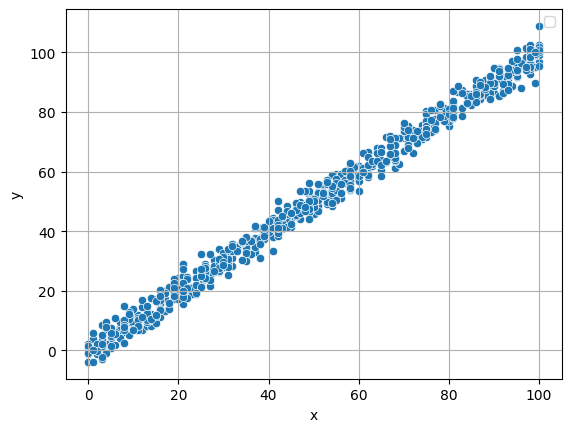

In [42]:
# plotting the graph to visulaize the data
sns.scatterplot(data = df_train,x="x",y="y")
xlabel = "x"
ylabel = "y"
plt.grid()
plt.legend()
plt.show()

In [43]:
# now initiallizing the variables to train the model using linearRegression
X_train = df_train[["x"]]
y_train = df_train["y"]
from sklearn.linear_model import LinearRegression # importing the LinearRegression class 
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [44]:
#testing variables
X_test = df_test[["x"]]
#point to remember the X parameter must be a dataframe and y can be array or panda series  
y_test = df_test["y"]


In [45]:
# testing the Model
X_test = df_test[["x"]]
y_test = df_test["y"]
y_predict = model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error #Evaluating the model using R-squared,MSE 

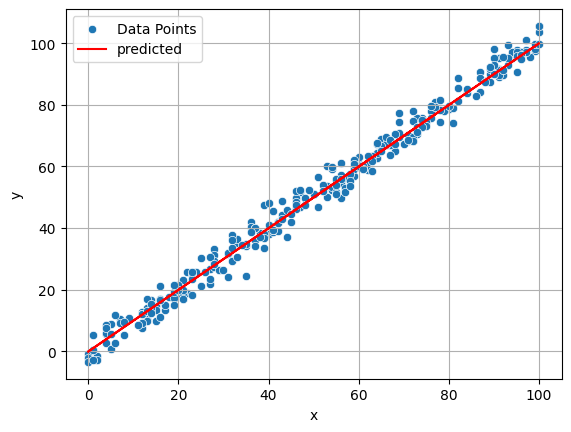

In [46]:
# showing the best fit line for the data 
sns.scatterplot(data = df_test,x="x",y="y",label = "Data Points")
xlabel = "x"
ylabel = "y"
plt.grid()
plt.plot(X_test,y_predict,color = "Red",label = "predicted")


plt.legend()
plt.show()

In [47]:
#closed form solution for linear regression problem OLS(ordinary least square)
class ols():
    def __init__(self):
        self.m = None
        self.b = None

    def fit(self,X_train,y_train):
        X_train = np.array(X_train)
        y_train = np.array(y_train)

        self.m = 1
        self.b = 0 
        for i in range(X_train.shape[0]):
            self.m = ((y_train[i] - y_train.mean())*(X_train[i]-X_train.mean()))/((X_train[i]-X_train.mean())**2)
            self.b = y_train.mean() - self.m*X_train.mean()

        return(self.m,self.b)
    

    def predict(self,X_test):
        
        X_test = np.array(X_test)

        return self.m*X_test + self.b


In [48]:
# calling my class 
mlr = ols()
coef_,intercept_ = mlr.fit(X_train,y_train)
y_pred = mlr.predict(X_test)
print(coef_,intercept_)

[0.95849167] [2.00157317]


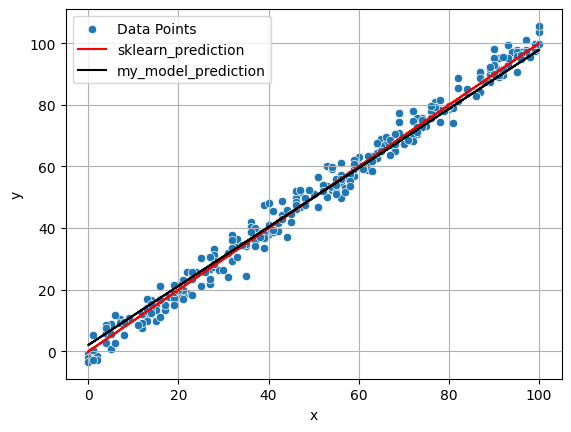

In [49]:
# checking my model vs sklearn 
sns.scatterplot(data = df_test,x="x",y="y",label = "Data Points")
xlabel = "x"
ylabel = "y"
plt.grid()
plt.plot(X_test,y_predict,color = "Red",label = "sklearn_prediction")
plt.plot(X_test,y_pred,color = "Black",label = "my_model_prediction")



plt.legend()
plt.show()

In [50]:
# now showing differneces in metrics of my model and sklearn model
sklearn_metric = r2_score(y_test,y_predict)
sklearn_metric_1 = mean_squared_error(y_test,y_predict)
my_model_metric = r2_score(y_test,y_predict)
my_model_metric_1 = mean_squared_error(y_test,y_predict)
#intercept and coeficient of both models
print(f"sklearn model coeficient {model.coef_} and intercept {model.intercept_}")
print(f"my model coeficient {coef_} and intercept {intercept_}")
# r2 score and mse of both models
print(f"sklearn model r2 score {sklearn_metric} and mean squared error {sklearn_metric_1}")
print(f"my model r2 score {my_model_metric} and mean squared error {my_model_metric_1}")



sklearn model coeficient [1.00065638] and intercept -0.10726546430095141
my model coeficient [0.95849167] and intercept [2.00157317]
sklearn model r2 score 0.9888014444327563 and mean squared error 9.432922192039317
my model r2 score 0.9888014444327563 and mean squared error 9.432922192039317
